In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [2]:
os.chdir('E:\Data\Cristano_Ronaldo_Final_v1')

In [3]:
data  = pd.read_csv('data.csv')

In [4]:
data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [5]:
data.shape

(30697, 28)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [7]:
data['knockout_match'].unique()

array([ 0., nan,  1.])

In [8]:
data.isnull().sum()

Unnamed: 0                   0
match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [9]:
data['type_of_shot'].fillna('unknown',inplace=True)
data['type_of_combined_shot'].fillna('unknown',inplace=True)

In [10]:
cnames = ['knockout_match']
cdnames=['game_season','home/away']
data['game_season'].fillna('null', inplace = True)
data['home/away'].fillna('null', inplace = True)


In [11]:
for i in cnames:
    for j in range(30697):
        if data.loc[j,i]!=0.0 and data.loc[j,i]!=1.0:
            data.loc[j,i]=data.loc[j-1,i]
            
            
for i in cdnames:
    for j in range(30697):
        if data.loc[j,i]=='null':
            data.loc[j,i]=data.loc[j-1,i]    
        
        

In [12]:
data['home/away']=data['home/away'].astype('category')

In [13]:
data = data.drop(['team_name','Unnamed: 0','team_id','date_of_game','location_x','location_y','lat/lng'],axis=1)

In [14]:
data.head(20)

,match_event_id,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,...,home/away,shot_id_number,type_of_shot,type_of_combined_shot,match_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,...,MANU @ POR,1.0,shot - 30,unknown,20000012,10.00,1.00,50.608,54.2000,38.0
1,12.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,...,MANU @ POR,2.0,shot - 45,unknown,20000012,10.00,1.00,28.800,22.0000,35.0
2,35.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,...,MANU @ POR,3.0,shot - 25,unknown,20000012,92.64,1.00,0.000,63.7216,54.4
3,43.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,...,MANU @ POR,4.0,unknown,shot - 3,20000012,NaN,1.00,122.608,52.0000,42.0
4,155.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,...,MANU @ POR,5.0,unknown,shot - 1,20000012,42.64,2.00,0.000,19.0000,20.0
5,244.0,9.0,3.0,0.0,2000-01,32.0,34.0,0.0,Left Side(L),Mid Range,...,MANU @ POR,6.0,shot - 17,unknown,20000012,9.00,3.00,0.000,NaN,34.0
6,251.0,8.0,NaN,0.0,2000-01,52.0,20.0,1.0,Center(C),Goal Area,...,MANU @ POR,7.0,unknown,shot - 4,20000012,8.00,3.00,0.000,112.2000,89.4
7,254.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,Center(C),Goal Area,...,MANU @ POR,8.0,unknown,shot - 3,20000012,68.64,3.00,0.000,5.0000,22.0
8,265.0,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,Left Side(L),Goal Line,...,MANU @ POR,9.0,shot - 36,unknown,20000012,6.00,3.00,0.000,12.0000,32.0
9,294.0,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,Center(C),Goal Line,...,MANU @ POR,10.0,shot - 44,unknown,20000012,3.00,3.00,0.000,52.2000,NaN


In [15]:
data['shot_id_number'].unique()

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 3.0695e+04, 3.0696e+04,
       3.0697e+04])

In [16]:
data=data.drop(['match_event_id','remaining_sec'],axis=1)

In [17]:
data.dtypes

remaining_min             float64
power_of_shot             float64
knockout_match            float64
game_season                object
distance_of_shot          float64
is_goal                   float64
area_of_shot               object
shot_basics                object
range_of_shot              object
home/away                category
shot_id_number            float64
type_of_shot               object
type_of_combined_shot      object
match_id                    int64
remaining_min.1           float64
power_of_shot.1           float64
knockout_match.1          float64
remaining_sec.1           float64
distance_of_shot.1        float64
dtype: object

In [18]:
data.describe()

,remaining_min,power_of_shot,knockout_match,distance_of_shot,is_goal,shot_id_number,match_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,29135.000000,29211.000000,30697.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,4.883233,2.519359,0.146562,33.448884,0.445331,15368.581039,2.476407e+07,18.204615,15.994109,16.599402,39.027303,38.801852
std,3.452533,1.153976,0.353674,9.369656,0.497013,8866.520772,7.755175e+06,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,0.000000,1.000000,0.000000,0.000000,9.400000
25%,2.000000,1.000000,0.000000,25.000000,0.000000,7693.250000,2.050008e+07,3.000000,2.000000,0.000000,17.000000,26.000000
50%,5.000000,3.000000,0.000000,35.000000,0.000000,15378.500000,2.090035e+07,6.000000,3.000000,0.000000,35.000000,36.000000
75%,8.000000,3.000000,0.000000,41.000000,1.000000,23055.750000,2.960047e+07,11.000000,4.000000,1.000000,52.000000,44.000000
max,11.000000,7.000000,1.000000,99.000000,1.000000,30697.000000,4.990009e+07,128.761600,118.360000,141.352320,144.785600,115.728000


In [19]:
data['area_of_shot'].mode()

0    Center(C)
dtype: object

In [20]:
data['area_of_shot'].fillna('Center(C)',inplace=True)

In [21]:
data['shot_basics'].fillna('Mid Range',inplace=True)

In [22]:
data['distance_of_shot'] = data.groupby('shot_basics')['distance_of_shot'].transform(lambda x: x.fillna(x.mean()))

In [23]:
data['power_of_shot'].mode()


0    3.0
dtype: float64

In [24]:
data['power_of_shot'].fillna(3.0,inplace=True)

In [25]:
data['remaining_min'].fillna(data['remaining_min'].mean(),inplace=True)

In [26]:
num_var=['remaining_min','remaining_sec','remaining_min.1','remaining_sec.1','power_of_shot.1','is_goal','distance_of_shot.1','distance_of_shot']

C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


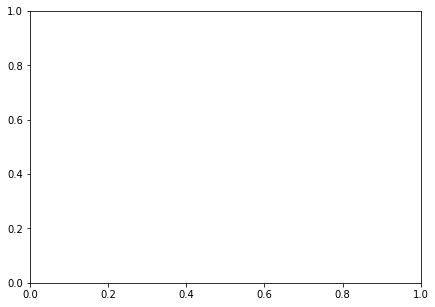

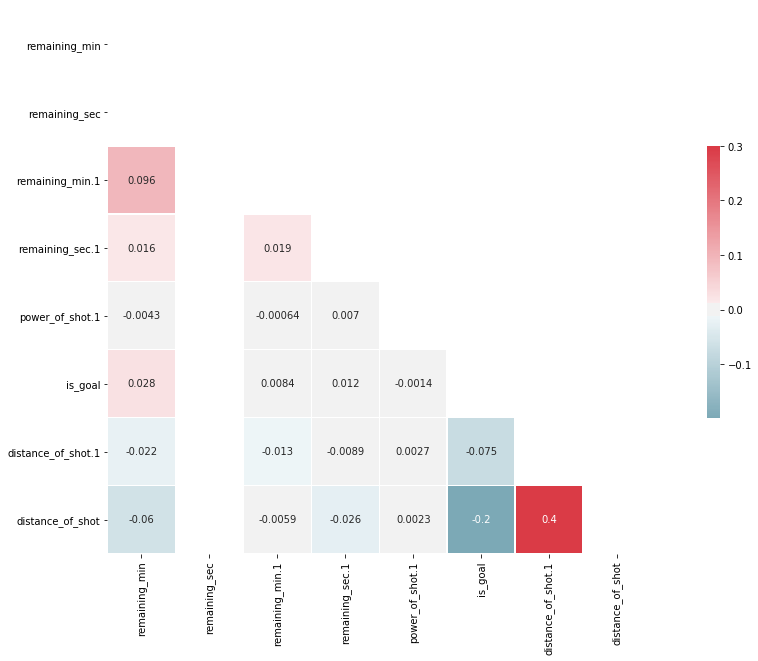

In [27]:

#generate a dataframe of continous variables
data_corr=data.loc[:,num_var]

#set the height and width of the plot
h,w=plt.subplots(figsize=(7,5))

#generate correlation matrix
corr=data_corr.corr()

#plot heat map
#sns.heatmap(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig = plt.subplots(figsize=(20,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [28]:
data = data.drop(['remaining_min.1','remaining_sec.1','power_of_shot.1','knockout_match.1'],axis=1)
                 

In [29]:
data = data.drop(['distance_of_shot.1'],axis=1)

In [30]:
data.isnull().sum()

remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot            1564
home/away                   0
shot_id_number           1563
type_of_shot                0
type_of_combined_shot       0
match_id                    0
dtype: int64

In [31]:
data = data.drop(['range_of_shot'],axis=1)

In [32]:
data['shot_id_number'].fillna(0.0, inplace = True)

for i in range(30697):
    if data['shot_id_number'][i]==0.0:
        data['shot_id_number'][i]=data['shot_id_number'][i-1]+1

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
data['home/away']=data['home/away'].astype('category')
data['knockout_match']=data['knockout_match'].astype('bool')
data['game_season']=data['game_season'].astype('category')
data['area_of_shot']=data['area_of_shot'].astype('category')
data['type_of_shot']=data['type_of_shot'].astype('category')
data['type_of_combined_shot']=data['type_of_combined_shot'].astype('category')
data['shot_basics']=data['shot_basics'].astype('category')
data['match_id']=data['match_id'].astype('category')
data['power_of_shot']=data['power_of_shot'].astype('category')


In [34]:
data.isnull().sum()

remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
home/away                   0
shot_id_number              0
type_of_shot                0
type_of_combined_shot       0
match_id                    0
dtype: int64

In [35]:
data.dtypes

remaining_min             float64
power_of_shot            category
knockout_match               bool
game_season              category
distance_of_shot          float64
is_goal                   float64
area_of_shot             category
shot_basics              category
home/away                category
shot_id_number            float64
type_of_shot             category
type_of_combined_shot    category
match_id                 category
dtype: object

In [36]:
nnames=['match_event_id','remaining_min','remaining_sec','distance_of_shot','shot_id_number','is_goal']

In [37]:
shot_id=data[data['is_goal'].isnull()]


In [38]:
shot_id

,remaining_min,power_of_shot,knockout_match,game_season,distance_of_shot,is_goal,area_of_shot,shot_basics,home/away,shot_id_number,type_of_shot,type_of_combined_shot,match_id
0,10.000000,1.0,False,2000-01,38.0,NaN,Right Side(R),Mid Range,MANU @ POR,1.0,shot - 30,unknown,20000012
7,8.000000,3.0,False,2000-01,22.0,NaN,Center(C),Goal Area,MANU @ POR,8.0,unknown,shot - 3,20000012
16,0.000000,1.0,False,2000-01,20.0,NaN,Center(C),Goal Area,MANU vs. UTA,17.0,unknown,shot - 4,20000019
19,10.000000,3.0,False,2000-01,20.0,NaN,Center(C),Mid Range,MANU vs. UTA,20.0,shot - 4,unknown,20000019
21,9.000000,3.0,False,2000-01,38.0,NaN,Right Side Center(RC),Mid Range,MANU vs. UTA,22.0,shot - 24,unknown,20000019
32,11.000000,1.0,False,2000-01,37.0,NaN,Right Side(R),Mid Range,MANU @ VAN,33.0,shot - 34,unknown,20000047
33,10.000000,1.0,False,2000-01,40.0,NaN,Right Side Center(RC),Mid Range,MANU @ VAN,34.0,unknown,shot - 3,20000047
34,7.000000,1.0,False,2000-01,21.0,NaN,Center(C),Goal Area,MANU @ VAN,35.0,shot - 39,unknown,20000047
35,5.000000,1.0,False,2000-01,21.0,NaN,Center(C),Goal Area,MANU @ VAN,36.0,shot - 39,unknown,20000047
36,4.000000,1.0,False,2000-01,20.0,NaN,Center(C),Goal Area,MANU @ VAN,37.0,unknown,shot - 4,20000047


In [39]:
shot_id_number=shot_id['shot_id_number']

In [40]:
shot_id_number=shot_id_number.reset_index()


In [41]:
shot_id_number=shot_id_number.drop(['index'],axis=1)

In [42]:
shot_id_number

,shot_id_number
0,1.0
1,8.0
2,17.0
3,20.0
4,22.0
5,33.0
6,34.0
7,35.0
8,36.0
9,37.0


In [43]:
data = data.drop(['shot_id_number'],axis=1)

In [44]:
train_data = data[pd.notnull(data['is_goal'])]

In [45]:
#Chisquare test of independence
#Save categorical variables
cat_names = ['knockout_match','game_season','area_of_shot','shot_basics','home/away','type_of_shot','type_of_combined_shot','power_of_shot','match_id']

In [46]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train_data['is_goal'], train_data[i]))
    print(p)

knockout_match
0.9906201962142946
game_season
1.6565019708670635e-06
area_of_shot
6.6342699873916675e-106
shot_basics
1.9179907108694e-208
home/away
0.7562733854749446
type_of_shot
2.022288282364987e-147
type_of_combined_shot
1.6565294590379487e-148
power_of_shot
7.504874656049275e-07
match_id
0.8195373984721264


In [47]:
data=data.drop(['knockout_match','home/away','match_id','power_of_shot'],axis=1)
train_data=train_data.drop(['knockout_match','home/away','match_id','power_of_shot'],axis=1)

In [48]:
data.head()

,remaining_min,game_season,distance_of_shot,is_goal,area_of_shot,shot_basics,type_of_shot,type_of_combined_shot
0,10.000000,2000-01,38.0,NaN,Right Side(R),Mid Range,shot - 30,unknown
1,10.000000,2000-01,35.0,0.0,Left Side(L),Mid Range,shot - 45,unknown
2,7.000000,2000-01,36.0,1.0,Left Side Center(LC),Mid Range,shot - 25,unknown
3,6.000000,2000-01,42.0,0.0,Right Side Center(RC),Mid Range,unknown,shot - 3
4,4.883233,2000-01,20.0,1.0,Center(C),Goal Area,unknown,shot - 1


In [49]:
train_data.dtypes

remaining_min             float64
game_season              category
distance_of_shot          float64
is_goal                   float64
area_of_shot             category
shot_basics              category
type_of_shot             category
type_of_combined_shot    category
dtype: object

In [50]:
x_train=train_data.drop(['is_goal'],axis=1)

In [51]:
train_data.shape

(24429, 8)

In [52]:
train_data.dtypes

remaining_min             float64
game_season              category
distance_of_shot          float64
is_goal                   float64
area_of_shot             category
shot_basics              category
type_of_shot             category
type_of_combined_shot    category
dtype: object

In [53]:
y_train=pd.DataFrame(train_data['is_goal'])

In [54]:
x_train['type_of_shot'].unique()

[shot - 45, shot - 25, unknown, shot - 17, shot - 36, ..., shot - 23, shot - 18, shot - 27, shot - 14, shot - 47]
Length: 58
Categories (58, object): [shot - 45, shot - 25, unknown, shot - 17, ..., shot - 18, shot - 27, shot - 14, shot - 47]

In [55]:
y_train.shape

(24429, 1)

In [56]:
y_train.head()

,is_goal
1,0.0
2,1.0
3,0.0
4,1.0
5,0.0


In [57]:
test_data=data[data['is_goal'].isnull()]

In [58]:
test_data.head()

,remaining_min,game_season,distance_of_shot,is_goal,area_of_shot,shot_basics,type_of_shot,type_of_combined_shot
0,10.0,2000-01,38.0,NaN,Right Side(R),Mid Range,shot - 30,unknown
7,8.0,2000-01,22.0,NaN,Center(C),Goal Area,unknown,shot - 3
16,0.0,2000-01,20.0,NaN,Center(C),Goal Area,unknown,shot - 4
19,10.0,2000-01,20.0,NaN,Center(C),Mid Range,shot - 4,unknown
21,9.0,2000-01,38.0,NaN,Right Side Center(RC),Mid Range,shot - 24,unknown


In [59]:
#preparing data for logistic regression
#Create logistic data. Save target variable first
train_logit = pd.DataFrame(train_data['is_goal'])

In [60]:
#saving numeric variables
cnames=['remaining_min','distance_of_shot']


In [61]:
test_logit = pd.DataFrame(test_data[cnames])

In [62]:
#Add continous variables
train_logit = train_logit.join(train_data[cnames])


In [63]:
train_logit.head()

,is_goal,remaining_min,distance_of_shot
1,0.0,10.000000,35.0
2,1.0,7.000000,36.0
3,0.0,6.000000,42.0
4,1.0,4.883233,20.0
5,0.0,9.000000,34.0


In [64]:
##Create dummies for categorical variables
cat_names = ['game_season','area_of_shot','shot_basics','type_of_shot','type_of_combined_shot']

for i in cat_names:
    temp = pd.get_dummies(train_data[i], prefix = i)
    train_logit = train_logit.join(temp)

In [65]:
for i in cat_names:
    temp = pd.get_dummies(test_data[i], prefix = i)
    test_logit = test_logit.join(temp)

In [66]:
test_logit.shape

(6268, 100)

In [67]:
train_logit.shape

(24429, 101)

In [68]:
train_logit.head()

,is_goal,remaining_min,distance_of_shot,game_season_1996-97,game_season_1997-98,game_season_1998-99,game_season_1999-00,game_season_2000-01,game_season_2001-02,game_season_2002-03,...,type_of_shot_shot - 8,type_of_shot_shot - 9,type_of_shot_unknown,type_of_combined_shot_shot - 0,type_of_combined_shot_shot - 1,type_of_combined_shot_shot - 2,type_of_combined_shot_shot - 3,type_of_combined_shot_shot - 4,type_of_combined_shot_shot - 5,type_of_combined_shot_unknown
1,0.0,10.000000,35.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,7.000000,36.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,6.000000,42.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1.0,4.883233,20.0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
5,0.0,9.000000,34.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
train_logit=train_logit.drop(['type_of_shot_unknown','type_of_combined_shot_unknown'],axis=1)

In [70]:
test_logit=test_logit.drop(['type_of_shot_unknown','type_of_combined_shot_unknown'],axis=1)

In [71]:
x_train=train_logit.drop(['is_goal'],axis=1)


In [72]:
y_train=pd.DataFrame(train_logit['is_goal'])

In [73]:
scaler = MinMaxScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train))

In [74]:
test_logit=pd.DataFrame(scaler.fit_transform(test_logit))

In [75]:
test_logit.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.909091,0.295082,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.727273,0.032787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.909091,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.818182,0.295082,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.909091,0.189873,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.636364,0.202532,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.545455,0.278481,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.443930,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.818182,0.177215,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
y_train.head()

,is_goal
1,0.0
2,1.0
3,0.0
4,1.0
5,0.0


In [78]:
x_train.shape

(24429, 98)

In [79]:
y_train=list(y_train['is_goal'])

In [80]:
y_train

[0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0

In [95]:
a_train, a_test, b_train, b_test = train_test_split( x_train, y_train, test_size = 0.2)

In [81]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(y_train, x_train).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.640985
         Iterations 8


C:\Users\Aditya\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                24429
Model:                          Logit   Df Residuals:                    24334
Method:                           MLE   Df Model:                           94
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                 0.06719
Time:                        03:27:34   Log-Likelihood:                -15659.
converged:                       True   LL-Null:                       -16787.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.1409      0.045      3.158      0.002       0.053       0.228
1             -2.6155      0.363     -7.214      0.000      -3.326      -1.905
2             -0.1180        nan        nan        nan         nan         nan
3             -0.2199        nan        nan        nan         nan         nan
4              0.0215        nan        nan        nan         nan         nan
5             -0.0022        nan        nan        nan         nan         nan
6              0.0106        nan        nan        nan         nan         nan
7             -0.0388        nan        nan        nan         nan         nan
8             -0.0578        nan        nan        nan         nan         nan
9             -0.1013        nan        nan        nan         nan         nan
10            -0.0374        nan        nan        nan         nan         nan
11             0.1116        nan        nan        nan         nan         nan
12             0.0727        nan        nan        nan         nan         nan
13             0.0613        nan        nan        nan         nan         nan
14             0.1070        nan        nan        nan         nan         nan
15             0.0485        nan        nan        nan         nan         nan
16             0.0104        nan        nan        nan         nan         nan
17            -0.0590        nan        nan        nan         nan         nan
18             0.0356        nan        nan        nan         nan         nan
19            -0.1936        nan        nan        nan         nan         nan
20            -0.2521        nan        nan        nan         nan         nan
21            -0.2878        nan        nan        nan         nan         nan
22             0.4131   4.01e+05   1.03e-06      1.000   -7.86e+05    7.86e+05
23             0.4093   1.18e+06   3.48e-07      1.000    -2.3e+06     2.3e+06
24             0.1789   1.36e+06   1.32e-07      1.000   -2.66e+06    2.66e+06
25            -2.5973   1.28e+06  -2.03e-06      1.000    -2.5e+06     2.5e+06
26             0.4717   1.18e+06   4.01e-07      1.000    -2.3e+06     2.3e+06
27             0.2357   1.39e+06   1.69e-07      1.000   -2.73e+06    2.73e+06
28             0.2828        nan        nan        nan         nan         nan
29            -0.4891        nan        nan        nan         nan         nan
30            -0.0112        nan        nan        nan         nan         nan
31             0.2012        nan        nan        nan         nan         nan
32            -0.2991        nan        nan        nan         nan         nan
33            -0.3368        nan        nan        nan         nan         nan
34            -0.2364        nan        nan        nan         nan         nan
35             0.2587        nan        nan        nan         nan         nan
36             0.2048        nan        nan        nan         nan         nan
37            -0.1730        nan        nan        nan         nan         nan
38

In [82]:
test_logit

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.909091,0.295082,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.727273,0.032787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.909091,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.818182,0.295082,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.278689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.909091,0.327869,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.636364,0.016393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.454545,0.016393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.363636,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
#Predict test data
test_logit['is_goal'] = logit.predict(test_logit)
#test['ActualVal'] = 1
#test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

In [84]:
test_logit

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,is_goal
0,0.909091,0.295082,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241836
1,0.727273,0.032787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.685433
2,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.570272
3,0.909091,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.639189
4,0.818182,0.295082,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410701
5,1.000000,0.278689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256272
6,0.909091,0.327869,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.379768
7,0.636364,0.016393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410348
8,0.454545,0.016393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.404164
9,0.363636,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.582779


In [85]:
actual_prob=test_logit['is_goal']

In [ ]:
actual_prob

In [87]:
actual_prob=actual_prob.to_frame()

In [ ]:
shot_id_number

In [89]:
actual_prob=shot_id_number.join(actual_prob)

In [ ]:
actual_prob

In [92]:
actual_prob.to_csv('submission.csv')

In [96]:
logit = sm.Logit(b_train, a_train).fit()

         Current function value: 0.639506
         Iterations: 35


C:\Users\Aditya\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [120]:
#Predict test data
y_pred = logit.predict(a_test)

In [107]:
#MAPE function(for Model Evaluation)
def MAPE(y_true,y_pred):
    MAPE = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return MAPE

In [121]:
MAPE(b_test,y_pred)

inf